In [1]:
# for macOS
!pip3 install --user matplotlib seaborn pandas mpld3
# !pip install matplotlib seaborn pandas mpld3

You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [240]:
import csv
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np

In [243]:

rankRuntimesFile = "../rankRuntimesFile.csv"
breedRuntimesFile = "../breedRuntimesFile.csv"
mutateRuntimesFile = "../mutateRuntimesFile.csv"

rank_df = pd.read_csv(rankRuntimesFile)
breed_df = pd.read_csv(breedRuntimesFile)
mutate_df = pd.read_csv(mutateRuntimesFile)

combined_df = rank_df
combined_df = combined_df.join(breed_df)
combined_df = combined_df.join(mutate_df)

combined_df.columns = ['ranking', 'crossover', 'mutation'] # change column names

combined_df


,ranking,crossover,mutation
0,12046,58998,325
1,12817,19176,432
2,12778,18666,415
3,12315,18557,572
4,11915,18511,367
...,...,...,...
9995,6718,16748,335
9996,6740,17257,486
9997,6878,16770,374
9998,6913,16771,353


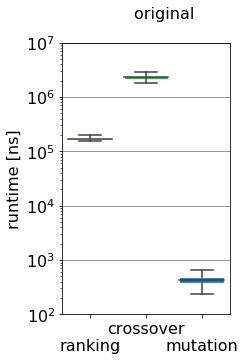

In [229]:
########################
# Without optimization #
########################

# figure size
fig = plt.figure(figsize=(3,5))
plt.ylabel('runtime [ns]', fontsize=16)
# white space necessary as padding
fig.suptitle('        original', fontsize=16)
# boxplot
# turn off outliers
ax = sns.boxplot(data=combined_df, showfliers=False, fliersize=1)
# log scale
ax.set_yscale('log')
# box style
# tab:orange, tab:blue, tab:green
box = ax.artists[0]
box.set_facecolor('tab:orange')
box.set_edgecolor('white')
box = ax.artists[1]
box.set_facecolor('tab:green')
box.set_edgecolor('white')
box.set_linewidth(1.2)
box = ax.artists[2]
box.set_facecolor('tab:blue')
box.set_edgecolor('white')
box.set_linewidth(1.2)
# y limits
ax.set_ylim([1e2, 1e7]) 
# label size
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
# pad ticks
labels = ax.get_xticklabels()
labels[0].set_text("\nranking")
labels[2].set_text("\nmutation")
ax.set_xticklabels(labels)
# grid
plt.rc('grid', linestyle="-", color='tab:gray')
ax.yaxis.grid(True)
plt.show()
# y label
# save
# padding to avoid cutting off tick labels
fig.tight_layout(pad=2)
plt.show()
fig.savefig('profiling_data0.eps')

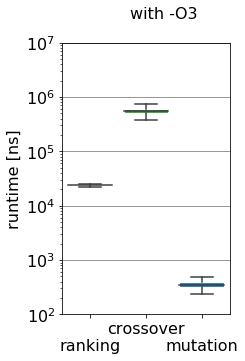

In [222]:
#####################
# with optimization #
#####################

# figure size
fig = plt.figure(figsize=(3,5))
plt.ylabel('runtime [ns]', fontsize=16)
# white space necessary as padding
fig.suptitle('        with -O3', fontsize=16)
# boxplot
# turn off outliers
ax = sns.boxplot(data=combined_df, showfliers=False, fliersize=1)
# log scale
ax.set_yscale('log')
# box style
# tab:orange, tab:blue, tab:green
box = ax.artists[0]
box.set_facecolor('tab:orange')
box.set_edgecolor('white')
box = ax.artists[1]
box.set_facecolor('tab:green')
box.set_edgecolor('white')
box.set_linewidth(1.2)
box = ax.artists[2]
box.set_facecolor('tab:blue')
box.set_edgecolor('white')
box.set_linewidth(1.2)
# y limits
ax.set_ylim([1e2, 1e7]) 
# label size
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
# pad ticks
labels = ax.get_xticklabels()
labels[0].set_text("\nranking")
labels[2].set_text("\nmutation")
ax.set_xticklabels(labels)
# grid
plt.rc('grid', linestyle="-", color='tab:gray')
ax.yaxis.grid(True)
plt.show()
# y label
# save
# padding to avoid cutting off tick labels
fig.tight_layout(pad=2)
plt.show()
fig.savefig('profiling_data1.eps')

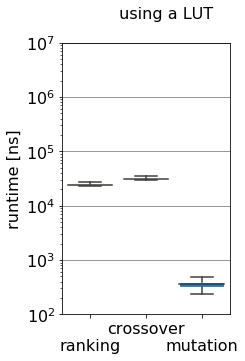

In [225]:
###############
# using a LUT #
###############

# figure size
fig = plt.figure(figsize=(3,5))
plt.ylabel('runtime [ns]', fontsize=16)
# white space necessary as padding
fig.suptitle('         using a LUT', fontsize=16)
# boxplot
# turn off outliers
ax = sns.boxplot(data=combined_df, showfliers=False, fliersize=1)
# log scale
ax.set_yscale('log')
# box style
# tab:orange, tab:blue, tab:green
box = ax.artists[0]
box.set_facecolor('tab:orange')
box.set_edgecolor('white')
box = ax.artists[1]
box.set_facecolor('tab:green')
box.set_edgecolor('white')
box.set_linewidth(1.2)
box = ax.artists[2]
box.set_facecolor('tab:blue')
box.set_edgecolor('white')
box.set_linewidth(1.2)
# y limits
ax.set_ylim([1e2, 1e7]) 
# label size
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
# pad ticks
labels = ax.get_xticklabels()
labels[0].set_text("\nranking")
labels[2].set_text("\nmutation")
ax.set_xticklabels(labels)
# grid
plt.rc('grid', linestyle="-", color='tab:gray')
ax.yaxis.grid(True)
plt.show()
# y label
# save
# padding to avoid cutting off tick labels
fig.tight_layout(pad=2)
plt.show()
fig.savefig('profiling_data2.eps')

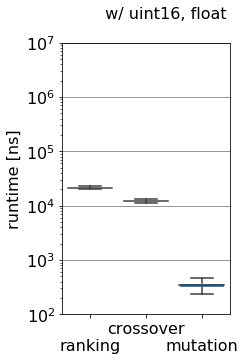

In [242]:
###############
# with smaller data types
###############

# figure size
fig = plt.figure(figsize=(3,5))
plt.ylabel('runtime [ns]', fontsize=16)
# white space necessary as padding
fig.suptitle('         w/ uint16, float', fontsize=16)
# boxplot
# turn off outliers
ax = sns.boxplot(data=combined_df, showfliers=False, fliersize=1)
# log scale
ax.set_yscale('log')
# box style
# tab:orange, tab:blue, tab:green
box = ax.artists[0]
box.set_facecolor('tab:orange')
box.set_edgecolor('white')
box = ax.artists[1]
box.set_facecolor('tab:green')
box.set_edgecolor('white')
box.set_linewidth(1.2)
box = ax.artists[2]
box.set_facecolor('tab:blue')
box.set_edgecolor('white')
box.set_linewidth(1.2)
# y limits
ax.set_ylim([1e2, 1e7]) 
# label size
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
# pad ticks
labels = ax.get_xticklabels()
labels[0].set_text("\nranking")
labels[2].set_text("\nmutation")
ax.set_xticklabels(labels)
# grid
plt.rc('grid', linestyle="-", color='tab:gray')
ax.yaxis.grid(True)
plt.show()
# y label
# save
# padding to avoid cutting off tick labels
fig.tight_layout(pad=2)
plt.show()
fig.savefig('profiling_data3.eps')

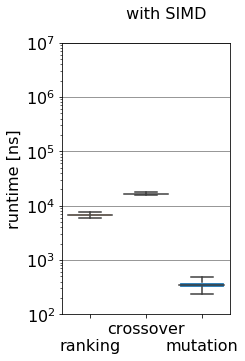

In [249]:
###############
# with SIMD
###############

# figure size
fig = plt.figure(figsize=(3,5))
plt.ylabel('runtime [ns]', fontsize=16)
# white space necessary as padding
fig.suptitle('         with SIMD', fontsize=16)
# boxplot
# turn off outliers
ax = sns.boxplot(data=combined_df, showfliers=False, fliersize=1)
# log scale
ax.set_yscale('log')
# box style
# tab:orange, tab:blue, tab:green
box = ax.artists[0]
box.set_facecolor('tab:orange')
box.set_edgecolor('white')
box = ax.artists[1]
box.set_facecolor('tab:green')
box.set_edgecolor('white')
box.set_linewidth(1.2)
box = ax.artists[2]
box.set_facecolor('tab:blue')
box.set_edgecolor('white')
box.set_linewidth(1.2)
# y limits
ax.set_ylim([1e2, 1e7]) 
# label size
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
# pad ticks
labels = ax.get_xticklabels()
labels[0].set_text("\nranking")
labels[2].set_text("\nmutation")
ax.set_xticklabels(labels)
# grid
plt.rc('grid', linestyle="-", color='tab:gray')
ax.yaxis.grid(True)
plt.show()
# y label
# save
# padding to avoid cutting off tick labels
fig.tight_layout(pad=2)
plt.show()
fig.savefig('profiling_data4.eps')

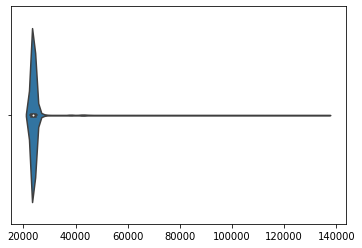

In [143]:

sns.violinplot(rank_df)


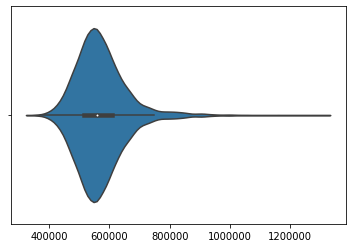

In [12]:

sns.violinplot(breed_df)


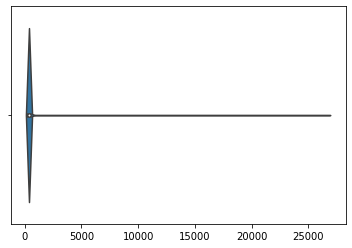

In [13]:

sns.violinplot(mutate_df)
